エピソード： 1
0.4203417899555322
迷路を解くためにかかったステップ数： 40
エピソード： 2
0.712361372478856
迷路を解くためにかかったステップ数： 124
エピソード： 3
0.26027195595734454
迷路を解くためにかかったステップ数： 56
エピソード： 4
0.0736965915551091
迷路を解くためにかかったステップ数： 4
エピソード： 5
0.06000031417656776
迷路を解くためにかかったステップ数： 4
エピソード： 6
0.04882095084016974
迷路を解くためにかかったステップ数： 4
エピソード： 7
0.0448360725498021
迷路を解くためにかかったステップ数： 4
エピソード： 8
0.04365775059137966
迷路を解くためにかかったステップ数： 4
エピソード： 9
0.04255052044131985
迷路を解くためにかかったステップ数： 4
エピソード： 10
0.04145615621175919
迷路を解くためにかかったステップ数： 4
エピソード： 11
0.040936001421431556
迷路を解くためにかかったステップ数： 4
エピソード： 12
0.040499627237645275
迷路を解くためにかかったステップ数： 4
エピソード： 13
0.040034573630851056
迷路を解くためにかかったステップ数： 4
エピソード： 14
0.039539584620338186
迷路を解くためにかかったステップ数： 4
エピソード： 15
0.03901327927965387
迷路を解くためにかかったステップ数： 4
エピソード： 16
0.03845443542885307
迷路を解くためにかかったステップ数： 4
エピソード： 17
0.037862175238457696
迷路を解くためにかかったステップ数： 4
エピソード： 18
0.037236075584288986
迷路を解くためにかかったステップ数： 4
エピソード： 19
0.03657622161969032
迷路を解くためにかかったステップ数： 4
エピソード： 20
0.035883218401712824
迷路を解

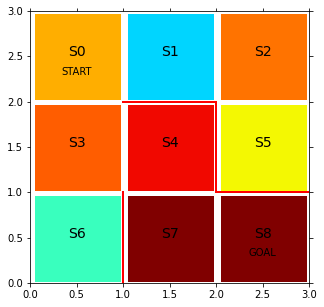

In [1]:
# Commented out IPython magic to ensure Python compatibility.
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

"""# 迷路環境設定"""

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='r', linewidth=2)
plt.plot([1, 2], [2, 2], color='r', linewidth=2)
plt.plot([2, 2], [2, 1], color='r', linewidth=2)
plt.plot([2, 3], [1, 1], color='r', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')
				
line, = ax.plot([0.5], [2.5], marker="o", color='c', markersize=60)

# 初期の方策（今回は移動できる方向）を決定するパラメータを定義する
# 行に移動できる方向を入れる（↑，→，↓，←）
# s8はゴールなので方策なし
theta_0 = np.array([
                    [np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7
                    ])
theta_0

# 方策パラメータθを行動方策の確率に変換する関数
def ratio_convert_pi(theta):

    # 行列サイズを取得
    [m, n] = theta.shape
    
    # 取得したサイズで零行列を作成
    pi = np.zeros((m, n))

    for i in range(0, m):
        # 割合計算
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    # nanを0に変換
    pi = np.nan_to_num(pi)

    return pi

# 行動方策の初期値
pi_0 = ratio_convert_pi(theta_0)
pi_0

# 行, 列の数を取得
[a, b] = theta_0.shape

# 初期行動価値関数をランダムに生成
Q = np.random.rand(a, b)

# 壁の方向をnanで置き換える
Q = Q * theta_0
Q

# ε-greedy法
# Q（行動価値関数）とε（ランダム確率）から次の行動を決める
def get_action(s, Q, epsilon, pi_0):
  direction = ["up", "right", "down", "left"]

  # 行動を決める
  if np.random.rand() < epsilon:
    # εの確率でランダムに動く
    next_direction = np.random.choice(direction, p=pi_0[s, :])
  else:
    # Qの最大値の行動を採用する
    # nanを除外したいのでnanargmaxで最大値のインデックスを取得する
    next_direction = direction[np.nanargmax(Q[s, :])]

  # 行動方向をインデックスに変換
  if next_direction == "up":
    action = 0
  elif next_direction == "right":
    action = 1
  elif next_direction == "down":
    action = 2
  elif next_direction == "left":
    action = 3

  return action


# 現在の状態sと次の行動aから次の状態s_nextを決める
def get_s_next(s, a):
  direction = ["up", "right", "down", "left"]
  next_direction = direction[a]

  if next_direction == "up":
    s_next = s - 3
  if next_direction == "right":
    s_next = s + 1
  if next_direction == "down":
    s_next = s + 3
  if next_direction == "left":
    s_next = s - 1

  return s_next

# SarsaによるQ（行動価値関数）の更新
def sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
  
  # ゴールした場合
  if s_next == 8:
    Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
  # 上記以外
  else:
    Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

  return Q

# スタートからゴールまでエージェントを移動させる関数
def move(Q, epsilon, eta, gamma, pi):
  # エージェントの初期位置
  s = 0
  # エージェントの初期行動
  a = a_next = get_action(s, Q, epsilon, pi)
  # エージェントの行動履歴
  state_list = [[0, np.nan]]

  # ゴールするまでエージェントを動かす
  while (1):
    # 行動更新
    a = a_next

    # 現在の状態に行動を格納
    state_list[-1][1] = a

    # 次の状態を現在の状態と行動から取得
    s_next = get_s_next(s, a)

    # 次の状態を格納（次の行動はまだ未定）
    state_list.append([s_next, np.nan])

    # 状態によって報酬を与えて，次の行動を決定する
    if s_next == 8:
      # ゴールした場合は報酬1を与える
      r = 1
      a_next = np.nan
    else:
      r = 0
      a_next = get_action(s_next, Q, epsilon, pi)

    Q = sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

    # 終了条件
    if s_next == 8:
      break
    else :
      s = s_next


  return [state_list, Q]

# Sarsaで学習させる処理
# 学習率
eta = 0.1
# 報酬割引率
gamma = 0.9
# ε-greedy法のランダム確率
epsilon = 0.5

# 状態価値の初期値
value = np.nanmax(Q, axis=1)

# エピソード数
episode = 1

# エピソード数の最大値（学習させる回数）
episode_limit = 100

# 状態価値の可視化
V = []
V.append(value)

while episode < episode_limit:
  print("エピソード：", str(episode))

  # ループの度にε-greedy法のランダム確率を下げる
  epsilon = epsilon / 2

  # エージェントをスタートからゴールまで動かしてQを更新する
  [state_list, Q] = move(Q, epsilon, eta, gamma, pi_0)

  # 状態価値の変化
  new_value = np.nanmax(Q, axis=1)
  print(np.sum(np.abs(new_value - value)))
  value = new_value

  # 状態価値の可視化
  V.append(value)

  # エピソード毎のステップ数
  print("迷路を解くためにかかったステップ数：", str(len(state_list) - 1))

  episode += 1

from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())